### Import the needed packages and define some functions and static variables 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

repositoryLink = r'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'

def CSVToPandasDataFrame(pathFileName, delimiter, low_memory=False):
    data = pd.read_csv(pathFileName, sep=delimiter, low_memory=low_memory)
    return pd.DataFrame(data)

### Reading HR dataset from GitHub repository 

In [2]:
fileName = 'HR_people_analytics.csv'
HRData = CSVToPandasDataFrame(
    pathFileName = repositoryLink + fileName, 
    delimiter=','
)

HRData

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
HRData.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [4]:
HRData.duplicated().any()

False

### Drop any columns that refer for uniqueness

In [5]:
HRData.drop(
[
    'Employee_Name', 
    'EmpID', 
    'Zip', 
    'ManagerName', 
    'ManagerID'
], axis=1, inplace=True)

### Drop any duplicated columns

In [6]:
HRData.drop(
[
    'MaritalDesc', #MaritalStatusID
    'MaritalStatusID', #related to MaritalStatusID
    'Sex', #GenderID
    'Position', #PositionID
    'Department', #DeptID
    'PerformanceScore', #PerfScoreID
    'Termd', #related to EmploymentStatus
    'FromDiversityJobFairID', #related to RecruitmentSource
    'DateofTermination' #related to LastPerformanceReview_Date
], axis=1, inplace=True)

### Get age from *DOB* and drop *DOB*

In [7]:
HRData['DOB'] = pd.to_datetime(HRData['DOB'], format='%m/%d/%y')
HRData['Age'] = abs(2019 - HRData['DOB'].dt.year)
HRData.drop(['DOB'], axis=1, inplace=True)

### Get days of employment and drop *DateofHire* and *LastPerformanceReview_Date*

In [8]:
HRData['DateofHire'] = pd.to_datetime(HRData['DateofHire'], format='%m/%d/%Y')
HRData['LastPerformanceReview_Date'] = pd.to_datetime(HRData['LastPerformanceReview_Date'], format='%m/%d/%Y')
HRData['EmploymentYears'] = HRData['LastPerformanceReview_Date'].dt.year - HRData['DateofHire'].dt.year 
HRData.drop(['DateofHire','LastPerformanceReview_Date'], axis=1, inplace=True)

In [9]:
HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MarriedID             311 non-null    int64  
 1   GenderID              311 non-null    int64  
 2   EmpStatusID           311 non-null    int64  
 3   DeptID                311 non-null    int64  
 4   PerfScoreID           311 non-null    int64  
 5   Salary                311 non-null    int64  
 6   PositionID            311 non-null    int64  
 7   State                 311 non-null    object 
 8   CitizenDesc           311 non-null    object 
 9   HispanicLatino        311 non-null    object 
 10  RaceDesc              311 non-null    object 
 11  TermReason            311 non-null    object 
 12  EmploymentStatus      311 non-null    object 
 13  RecruitmentSource     311 non-null    object 
 14  EngagementSurvey      311 non-null    float64
 15  EmpSatisfaction       3

###Todo --- Handle Outliers
---

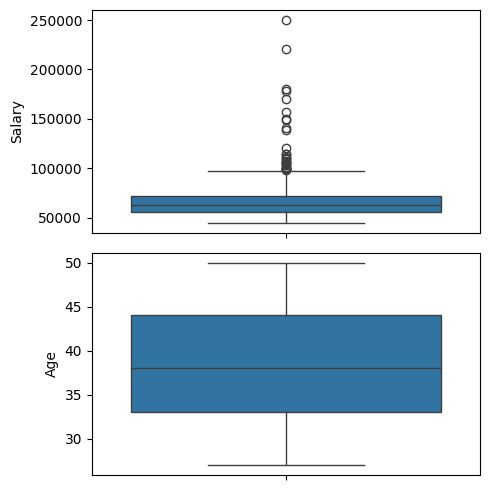

In [10]:
#Outliers detection with seaborn
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(HRData['Salary'], ax = axs[0])
plt2 = sns.boxplot(HRData['Age'], ax = axs[1])
plt.tight_layout()

C:\Users\iman.hadi\AppData\Local\Temp\ipykernel_15096\3129233442.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(HRData['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

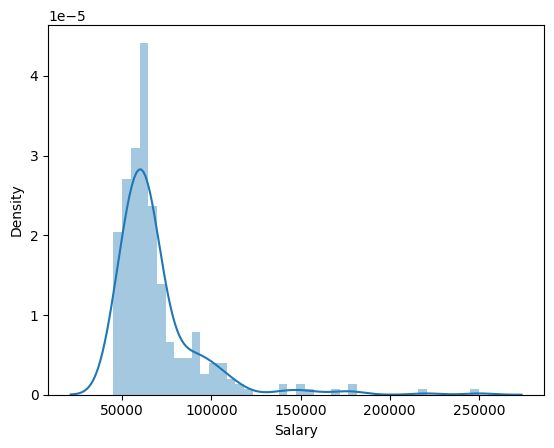

In [11]:
#Distribution (histogram) of the dependent (or target) variable 
sns.distplot(HRData['Salary'])

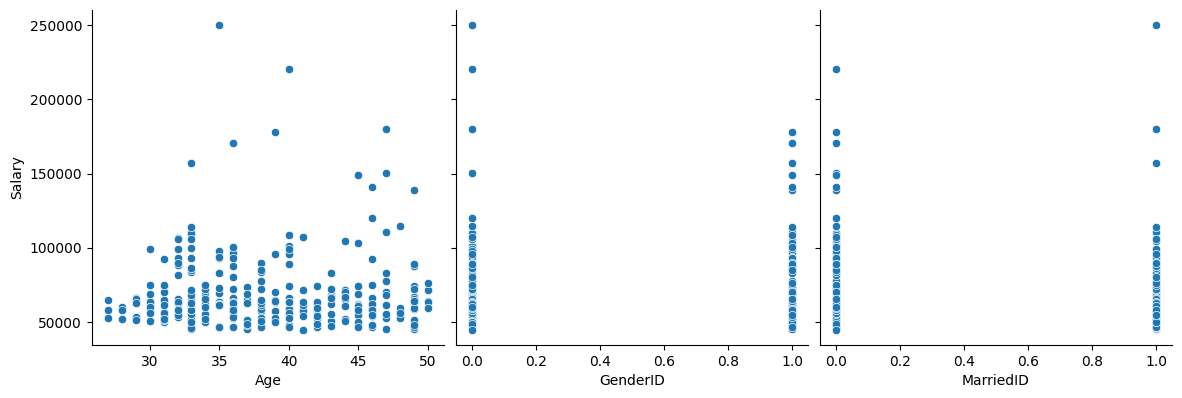

In [12]:
#Analyze correlation between variables
sns.pairplot(HRData, x_vars=['Age', 'GenderID', 'MarriedID'], y_vars='Salary', height=4, aspect=1, kind='scatter')
plt.show()

C:\Users\iman.hadi\AppData\Local\Temp\ipykernel_15096\265414552.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HRData.corr(), annot = True, cmap="Blues")


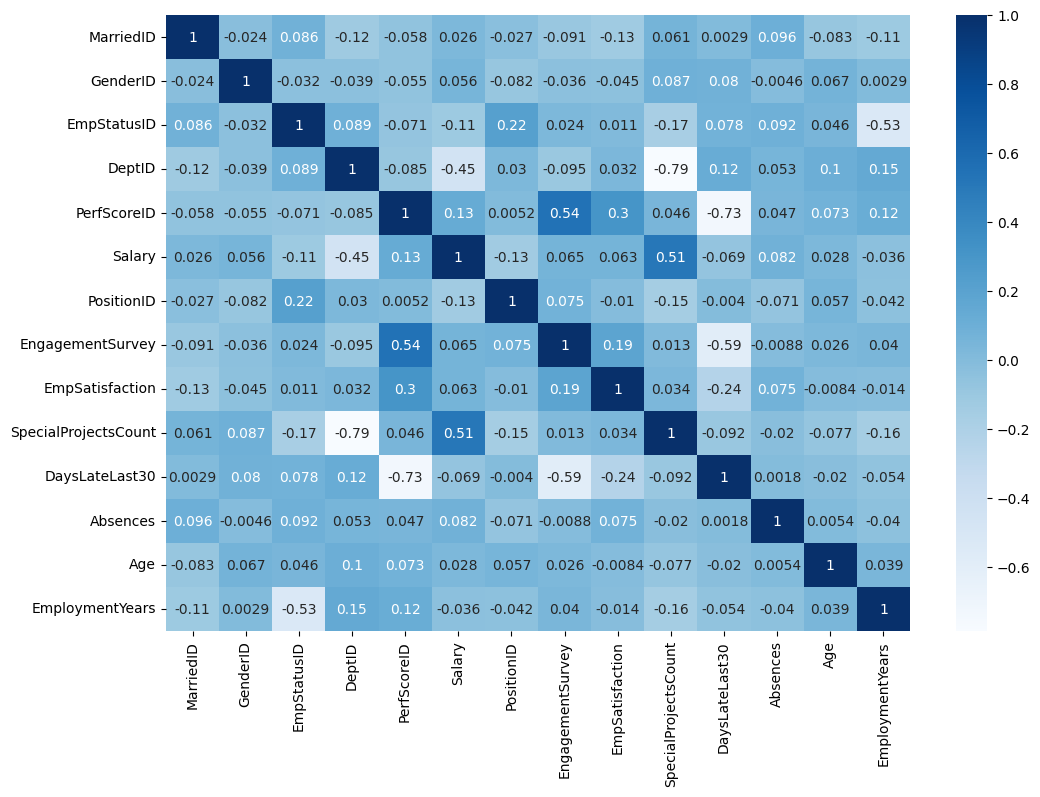

In [13]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(HRData.corr(), annot = True, cmap="Blues")
plt.show()

### Seprate the dataset into two types: *categorical* and *numerical*

In [23]:
numericalColumns = list(HRData.select_dtypes(include=['float64']).columns)

categoricalColumns = list(HRData.select_dtypes(include=['object']).columns)
categericalColumnIndexes = list(HRData.columns.get_indexer_for(categoricalColumns))

print(numericalColumns, categoricalColumns)

['EngagementSurvey'] ['State', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'RecruitmentSource']


### Scale numbers so the extremes do not bias the result

In [24]:
df_scaled = HRData.copy()
numcols = list(df_scaled.dtypes[df_scaled.dtypes == "float64"].index)

scaler = StandardScaler()
df_scaled[numcols] = scaler.fit_transform(df_scaled[numcols])

df_scaled.head()

,MarriedID,GenderID,EmpStatusID,DeptID,PerfScoreID,Salary,PositionID,State,CitizenDesc,HispanicLatino,...,TermReason,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,EmploymentYears
0,0,1,1,5,4,62506,19,MA,US Citizen,No,...,N/A-StillEmployed,Active,LinkedIn,0.621302,5,0,0,1,36,8
1,1,1,5,3,3,104437,27,MA,US Citizen,No,...,career change,Voluntarily Terminated,Indeed,1.077769,3,6,0,17,44,1
2,1,0,5,5,3,64955,20,MA,US Citizen,No,...,hours,Voluntarily Terminated,LinkedIn,-1.382080,3,0,0,3,31,1
3,1,0,1,5,3,64991,19,MA,US Citizen,No,...,N/A-StillEmployed,Active,Indeed,0.925613,5,0,0,15,31,11
4,0,0,5,5,3,50825,19,MA,US Citizen,No,...,return to school,Voluntarily Terminated,Google Search,1.128487,4,0,0,2,30,5


In [25]:
df_scaled.describe()

,MarriedID,GenderID,EmpStatusID,DeptID,PerfScoreID,Salary,PositionID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,EmploymentYears
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.434084,2.392283,4.610932,2.977492,69020.684887,16.845659,-4.083907e-16,3.890675,1.218650,0.414791,10.237942,38.536977,4.881029
std,0.490423,0.496435,1.794383,1.083487,0.587072,25156.636930,6.223419,1.001612e+00,0.909241,2.349421,1.294519,5.852596,6.257209,2.339422
min,0.000000,0.000000,1.000000,1.000000,1.000000,45046.000000,1.000000,-3.791210e+00,1.000000,0.000000,0.000000,1.000000,27.000000,0.000000
25%,0.000000,0.000000,1.000000,5.000000,3.000000,55501.500000,18.000000,-5.325445e-01,3.000000,0.000000,0.000000,5.000000,33.000000,3.000000
50%,0.000000,0.000000,1.000000,5.000000,3.000000,62810.000000,19.000000,2.155537e-01,4.000000,0.000000,0.000000,10.000000,38.000000,5.000000
75%,1.000000,1.000000,5.000000,5.000000,3.000000,72036.000000,20.000000,7.480982e-01,5.000000,0.000000,0.000000,15.000000,44.000000,6.000000
max,1.000000,1.000000,5.000000,6.000000,4.000000,250000.000000,30.000000,1.128487e+00,5.000000,8.000000,6.000000,20.000000,50.000000,13.000000


### Utilizing the Elbow method to determine the optimal number of clusters (k) to be used in k-prototype

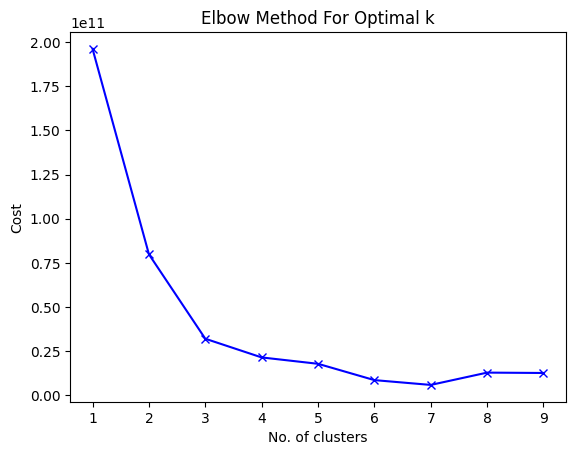

In [26]:
cost=[]
K = range(1,10)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init='random', n_init = 1, n_jobs=4)
    kproto.fit_predict(df_scaled, categorical=categericalColumnIndexes)
    cost.append(kproto.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

### Cluster the dataset into three groups by using *K-Prototype* unsupervised algorithm

In [27]:
kproto = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=0)
clusters = kproto.fit_predict(df_scaled, categorical=categericalColumnIndexes)
df_scaled['Cluster'] = clusters

df_scaled

,MarriedID,GenderID,EmpStatusID,DeptID,PerfScoreID,Salary,PositionID,State,CitizenDesc,HispanicLatino,...,EmploymentStatus,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,EmploymentYears,Cluster
0,0,1,1,5,4,62506,19,MA,US Citizen,No,...,Active,LinkedIn,0.621302,5,0,0,1,36,8,2
1,1,1,5,3,3,104437,27,MA,US Citizen,No,...,Voluntarily Terminated,Indeed,1.077769,3,6,0,17,44,1,0
2,1,0,5,5,3,64955,20,MA,US Citizen,No,...,Voluntarily Terminated,LinkedIn,-1.382080,3,0,0,3,31,1,2
3,1,0,1,5,3,64991,19,MA,US Citizen,No,...,Active,Indeed,0.925613,5,0,0,15,31,11,2
4,0,0,5,5,3,50825,19,MA,US Citizen,No,...,Voluntarily Terminated,Google Search,1.128487,4,0,0,2,30,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,1,1,5,3,65893,20,MA,US Citizen,No,...,Active,LinkedIn,-0.050719,4,0,0,13,34,5,2
307,0,0,5,5,1,48513,19,MA,US Citizen,No,...,Voluntarily Terminated,Google Search,-1.153846,2,0,5,4,37,7,2
308,0,0,1,3,4,220450,6,MA,US Citizen,No,...,Active,Employee Referral,0.621302,5,6,0,16,40,9,1
309,0,0,1,3,3,89292,9,MA,US Citizen,No,...,Active,Employee Referral,1.128487,3,5,0,11,40,4,0


### Display centroids and visualize the clusters counts

Cluster Centroids: [['0.5' '0.54' '2.24' '3.28' '3.06' '94834.86' '17.96'
  '0.030177520998398846' '3.88' '4.64' '0.14' '9.52' '37.92' '3.78' 'MA'
  'US Citizen' 'No' 'White' 'N/A-StillEmployed' 'Active' 'Indeed']
 ['0.3' '0.6' '1.4' '3.4' '3.3' '173504.7' '11.4' '0.1344040851189201'
  '4.2' '4.0' '0.4' '13.0' '41.7' '6.2' 'MA' 'US Citizen' 'No'
  'Black or African American' 'N/A-StillEmployed' 'Active' 'Indeed']
 ['0.38247011952191234' '0.4063745019920319' '2.462151394422311'
  '4.924302788844622' '2.948207171314741' '59715.70916334661'
  '16.840637450199203' '-0.011366202793264056' '3.8804780876494025'
  '0.4262948207171315' '0.4701195219123506' '10.270916334661354'
  '38.53386454183267' '5.047808764940239' 'MA' 'US Citizen' 'No' 'White'
  'N/A-StillEmployed' 'Active' 'LinkedIn']]


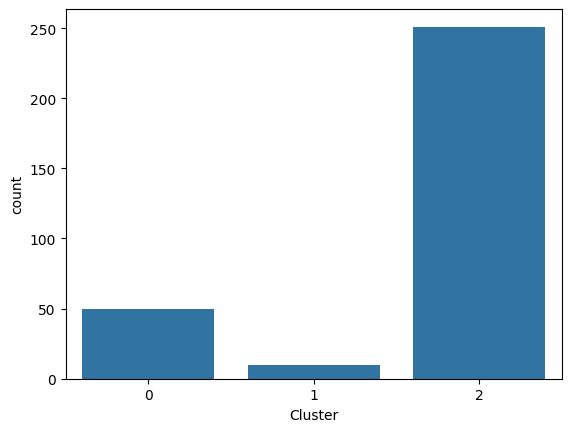

In [28]:
print(f'Cluster Centroids: {kproto.cluster_centroids_}')

sns.countplot(x='Cluster', data=df_scaled)
plt.show()

### Clusters analysis
---

In [29]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df_scaled, x="Salary", y="EmploymentYears", color="Cluster", title="Cluster by K prototypes", hover_data=["GenderID", "MarriedID"])
fig = px.scatter(df_scaled, x="Salary", y="Age", color="Cluster", title="Cluster by K prototypes", hover_data=["GenderID", "MarriedID"])
fig.show()

In [30]:
fig = px.scatter_3d(df_scaled, x='Salary', y='Age', z='MarriedID',color='Cluster')
fig = px.scatter_3d(df_scaled, x='Salary', y='EmploymentYears', z='MarriedID',color='Cluster')
fig.show()

### Save the dataset with group number in new CSV file

In [31]:
HRData.to_csv(r'Output/HR-Analysis-Clusters.csv', sep='|', index=False) 